In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.subplots as sp
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("wig_d.xlsx", usecols=['Data', 'Zamkniecie'])
df = pd.DataFrame(data)
display(df)

,Data,Zamkniecie
0,2014-01-02,51865.89
1,2014-01-03,51497.81
2,2014-01-07,50444.78
3,2014-01-08,50482.93
4,2014-01-09,49753.03
...,...,...
2538,2024-02-23,83265.56
2539,2024-02-26,83116.29
2540,2024-02-27,83007.32
2541,2024-02-28,81661.42


In [3]:
start_date = df['Data'].min()
end_date = df['Data'].max()


all_dates = pd.date_range(start=start_date, end=end_date, freq='B') 


df = df.set_index('Data').reindex(all_dates)
df = df.ffill().reset_index().rename(columns={'index': 'Data'})


df['Data'] = pd.to_datetime(df['Data'])
df['Dzień tygodnia'] = df['Data'].dt.weekday + 1  


df['Stopa zwrotu zwykła'] = df['Zamkniecie'].pct_change()
df['Stopa zwrotu logarytmiczna'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))

df = df.drop(index=df.index[0]).reset_index(drop=True)


print(df['Dzień tygodnia'].value_counts())
display(df)

Dzień tygodnia
5    530
1    530
2    530
3    530
4    530
Name: count, dtype: int64


,Data,Zamkniecie,Dzień tygodnia,Stopa zwrotu zwykła,Stopa zwrotu logarytmiczna
0,2014-01-03,51497.81,5,-0.007097,-0.007122
1,2014-01-06,51497.81,1,0.000000,0.000000
2,2014-01-07,50444.78,2,-0.020448,-0.020660
3,2014-01-08,50482.93,3,0.000756,0.000756
4,2014-01-09,49753.03,4,-0.014458,-0.014564
...,...,...,...,...,...
2645,2024-02-23,83265.56,5,0.009714,0.009667
2646,2024-02-26,83116.29,1,-0.001793,-0.001794
2647,2024-02-27,83007.32,2,-0.001311,-0.001312
2648,2024-02-28,81661.42,3,-0.016214,-0.016347


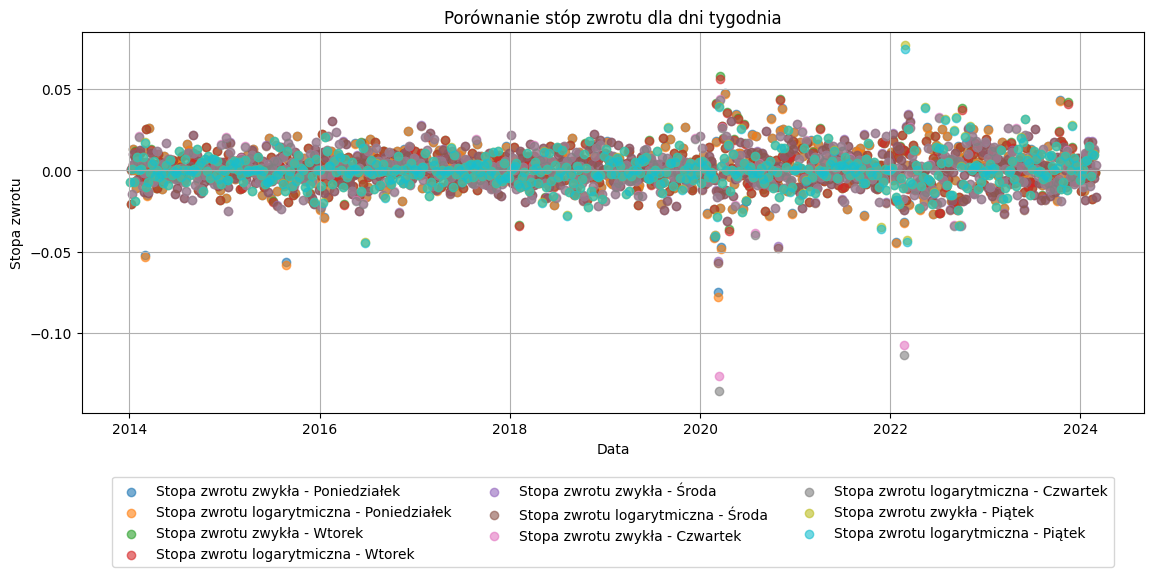

In [4]:
dni_tygodnia = {1: 'Poniedziałek', 2: 'Wtorek', 3: 'Środa', 4: 'Czwartek', 5: 'Piątek'}


global_min = min(df['Stopa zwrotu zwykła'].min(), df['Stopa zwrotu logarytmiczna'].min())
global_max = max(df['Stopa zwrotu zwykła'].max(), df['Stopa zwrotu logarytmiczna'].max())

plt.figure(figsize=(12, 6))


for i in range(1, 6):
    df_filtered = df[df['Dzień tygodnia'] == i]
    plt.scatter(df_filtered['Data'], df_filtered['Stopa zwrotu zwykła'], label=f'Stopa zwrotu zwykła - {dni_tygodnia[i]}', alpha=0.6)
    plt.scatter(df_filtered['Data'], df_filtered['Stopa zwrotu logarytmiczna'], label=f'Stopa zwrotu logarytmiczna - {dni_tygodnia[i]}', alpha=0.6)


plt.title('Porównanie stóp zwrotu dla dni tygodnia')
plt.xlabel('Data')
plt.ylabel('Stopa zwrotu')
plt.grid()


plt.ylim(global_min * 1.1, global_max * 1.1)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()  
plt.show()


C:\Users\Asverd\AppData\Local\Temp\ipykernel_20504\4165601698.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Różnica'] = df_filtered['Stopa zwrotu zwykła'] - df_filtered['Stopa zwrotu logarytmiczna']
C:\Users\Asverd\AppData\Local\Temp\ipykernel_20504\4165601698.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Różnica'] = df_filtered['Stopa zwrotu zwykła'] - df_filtered['Stopa zwrotu logarytmiczna']
C:\Users\Asverd\AppData\Local\Temp\ipykernel_20504\4165601698.py:11: Setti

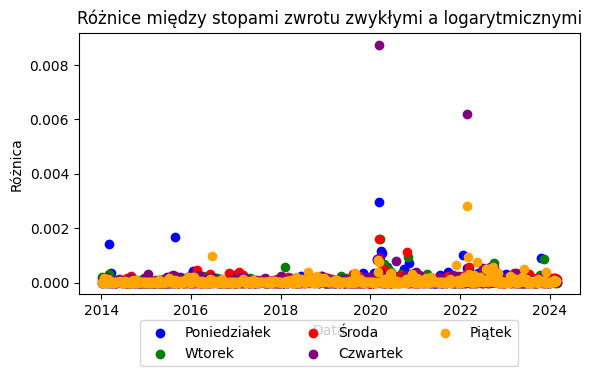

In [5]:

dni_tygodnia = {1: 'Poniedziałek', 2: 'Wtorek', 3: 'Środa', 4: 'Czwartek', 5: 'Piątek'}
colors = ['blue', 'green', 'red', 'purple', 'orange']  

fig, ax = plt.subplots(figsize=(6, 4))  


for i, (day_num, day_name) in enumerate(dni_tygodnia.items(), start=1):
    df_filtered = df[df['Dzień tygodnia'] == day_num]
    

    df_filtered['Różnica'] = df_filtered['Stopa zwrotu zwykła'] - df_filtered['Stopa zwrotu logarytmiczna']

    ax.scatter(df_filtered['Data'], df_filtered['Różnica'], label=day_name, color=colors[i-1])


ax.set_title('Różnice między stopami zwrotu zwykłymi a logarytmicznymi')
ax.set_xlabel('Data')
ax.set_ylabel('Różnica')


ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)  

plt.tight_layout()
plt.show()


In [6]:
df_poniedzialek = df[df['Dzień tygodnia'] == 1]  
df_wtorek = df[df['Dzień tygodnia'] == 2]        
df_sroda = df[df['Dzień tygodnia'] == 3]         
df_czwartek = df[df['Dzień tygodnia'] == 4]      
df_piatek = df[df['Dzień tygodnia'] == 5]        

In [7]:
from tabulate import tabulate

def pokaz_statystyki(df, nazwa):
    print(f"\nStatystyki opisowe dla {nazwa} (Stopa zwrotu):\n")
    
    wybrane_kolumny = ['Stopa zwrotu zwykła', 'Stopa zwrotu logarytmiczna']
    
    statystyki_opisowe = df[wybrane_kolumny].describe().T
    statystyki_opisowe['Mediana'] = df[wybrane_kolumny].median()
    
    statystyki_opisowe['Skośność'] = df[wybrane_kolumny].skew()
    statystyki_opisowe['Kurtoza'] = df[wybrane_kolumny].kurt()
    
    
    statystyki_opisowe = statystyki_opisowe.round(5)
    
    print(tabulate(statystyki_opisowe, headers='keys', tablefmt='pretty', floatfmt=".5f"))

pokaz_statystyki(df_poniedzialek, "Poniedziałek")
pokaz_statystyki(df_wtorek, "Wtorek")
pokaz_statystyki(df_sroda, "Środa")
pokaz_statystyki(df_czwartek, "Czwartek")
pokaz_statystyki(df_piatek, "Piątek")


Statystyki opisowe dla Poniedziałek (Stopa zwrotu):

+----------------------------+-------+---------+---------+----------+----------+---------+---------+---------+---------+----------+---------+
|                            | count |  mean   |   std   |   min    |   25%    |   50%   |   75%   |   max   | Mediana | Skośność | Kurtoza |
+----------------------------+-------+---------+---------+----------+----------+---------+---------+---------+---------+----------+---------+
|    Stopa zwrotu zwykła     | 530.0 | 0.00081 | 0.01198 | -0.07502 | -0.00399 | 0.00061 | 0.00641 | 0.04772 | 0.00061 | -0.93192 | 5.78721 |
| Stopa zwrotu logarytmiczna | 530.0 | 0.00074 | 0.01204 | -0.07799 |  -0.004  | 0.00061 | 0.00639 | 0.04662 | 0.00061 | -1.05875 | 6.30608 |
+----------------------------+-------+---------+---------+----------+----------+---------+---------+---------+---------+----------+---------+

Statystyki opisowe dla Wtorek (Stopa zwrotu):

+----------------------------+-------+--------

In [8]:
from scipy.stats import jarque_bera, kstest, shapiro

# Funkcja do wyświetlania statystyk oraz testów Jarque-Bera, Kolmogorova-Smirnova i Shapiro-Wilka dla wybranych kolumn
def pokaz_statystyki_i_testy(df, nazwa):
    wyniki = []
    wybrane_kolumny = ['Stopa zwrotu zwykła', 'Stopa zwrotu logarytmiczna']
    
    # Testy dla każdej z kolumn
    for kolumna in wybrane_kolumny:
        # Test Jarque-Bera
        jb_stat, jb_p_value = jarque_bera(df[kolumna])
        jb_normalny = jb_p_value > 0.05
        
        # Test Kolmogorova-Smirnova
        ks_stat, ks_p_value = kstest(df[kolumna], 'norm')
        ks_normalny = ks_p_value > 0.05
        
        # Test Shapiro-Wilka
        sw_stat, sw_p_value = shapiro(df[kolumna])
        sw_normalny = sw_p_value > 0.05
        
        # Dodaj wyniki do listy
        wyniki.append({
            'Kolumna': kolumna,
            'Test Jarque-Bera - Statystyka': jb_stat,
            'Test Jarque-Bera - p-value': jb_p_value,
            'JB Normalny': jb_normalny,
            'Test K-S - Statystyka': ks_stat,
            'Test K-S - p-value': ks_p_value,
            'K-S Normalny': ks_normalny,
            'Test Shapiro-Wilka - Statystyka': sw_stat,
            'Test Shapiro-Wilka - p-value': sw_p_value,
            'SW Normalny': sw_normalny
        })

    # Konwertuj wyniki na DataFrame
    wyniki_df = pd.DataFrame(wyniki)
    wyniki_df['Dzień tygodnia'] = nazwa
    return wyniki_df

# Stwórz pustą listę na wyniki dla każdego dnia tygodnia
wszystkie_wyniki = []

# Wyświetl testy dla każdego dnia tygodnia i zbierz wyniki
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_poniedzialek, "Poniedziałek"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_wtorek, "Wtorek"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_sroda, "Środa"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_czwartek, "Czwartek"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_piatek, "Piątek"))

# Połącz wszystkie wyniki w jeden DataFrame
wyniki_finalne = pd.concat(wszystkie_wyniki, ignore_index=True)

# Wyświetl końcową macierz wyników
print(wyniki_finalne)

                      Kolumna  Test Jarque-Bera - Statystyka  \
0         Stopa zwrotu zwykła                     799.181056   
1  Stopa zwrotu logarytmiczna                     957.075551   
2         Stopa zwrotu zwykła                     212.053428   
3  Stopa zwrotu logarytmiczna                     182.621090   
4         Stopa zwrotu zwykła                     116.058082   
5  Stopa zwrotu logarytmiczna                     137.159701   
6         Stopa zwrotu zwykła                   19371.365114   
7  Stopa zwrotu logarytmiczna                   26928.451092   
8         Stopa zwrotu zwykła                    1140.720442   
9  Stopa zwrotu logarytmiczna                     958.399288   

   Test Jarque-Bera - p-value  JB Normalny  Test K-S - Statystyka  \
0               2.884288e-174        False               0.481034   
1               1.491711e-208        False               0.481408   
2                8.978075e-47        False               0.485799   
3                2.

In [9]:
from scipy.stats import jarque_bera, kstest, shapiro

# Funkcja do wyświetlania statystyk oraz testów Jarque-Bera, Kolmogorova-Smirnova i Shapiro-Wilka dla wybranych kolumn
def pokaz_statystyki_i_testy(df, nazwa):
    wyniki = []
    wybrane_kolumny = ['Stopa zwrotu zwykła', 'Stopa zwrotu logarytmiczna']
    
    # Testy dla każdej z kolumn
    for kolumna in wybrane_kolumny:
        # Test Jarque-Bera
        jb_stat, jb_p_value = jarque_bera(df[kolumna])
        jb_normalny = jb_p_value > 0.05
        
        # Test Kolmogorova-Smirnova
        ks_stat, ks_p_value = kstest(df[kolumna], 'norm')
        ks_normalny = ks_p_value > 0.05
        
        # Test Shapiro-Wilka
        sw_stat, sw_p_value = shapiro(df[kolumna])
        sw_normalny = sw_p_value > 0.05
        
        # Dodaj wyniki do listy
        wyniki.append({
            'Kolumna': kolumna,
            'Test Jarque-Bera - Statystyka': jb_stat,
            'Test Jarque-Bera - p-value': jb_p_value,
            'JB Normalny': jb_normalny,
            'Test K-S - Statystyka': ks_stat,
            'Test K-S - p-value': ks_p_value,
            'K-S Normalny': ks_normalny,
            'Test Shapiro-Wilka - Statystyka': sw_stat,
            'Test Shapiro-Wilka - p-value': sw_p_value,
            'SW Normalny': sw_normalny
        })

    # Konwertuj wyniki na DataFrame
    wyniki_df = pd.DataFrame(wyniki)
    wyniki_df['Dzień tygodnia'] = nazwa
    return wyniki_df

# Stwórz pustą listę na wyniki dla każdego dnia tygodnia
wszystkie_wyniki = []

# Wyświetl testy dla każdego dnia tygodnia i zbierz wyniki
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_poniedzialek, "Poniedziałek"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_wtorek, "Wtorek"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_sroda, "Środa"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_czwartek, "Czwartek"))
wszystkie_wyniki.append(pokaz_statystyki_i_testy(df_piatek, "Piątek"))

# Połącz wszystkie wyniki w jeden DataFrame
wyniki_finalne = pd.concat(wszystkie_wyniki, ignore_index=True)

# Wyświetl końcową macierz wyników
print(wyniki_finalne)




                      Kolumna  Test Jarque-Bera - Statystyka  \
0         Stopa zwrotu zwykła                     799.181056   
1  Stopa zwrotu logarytmiczna                     957.075551   
2         Stopa zwrotu zwykła                     212.053428   
3  Stopa zwrotu logarytmiczna                     182.621090   
4         Stopa zwrotu zwykła                     116.058082   
5  Stopa zwrotu logarytmiczna                     137.159701   
6         Stopa zwrotu zwykła                   19371.365114   
7  Stopa zwrotu logarytmiczna                   26928.451092   
8         Stopa zwrotu zwykła                    1140.720442   
9  Stopa zwrotu logarytmiczna                     958.399288   

   Test Jarque-Bera - p-value  JB Normalny  Test K-S - Statystyka  \
0               2.884288e-174        False               0.481034   
1               1.491711e-208        False               0.481408   
2                8.978075e-47        False               0.485799   
3                2.

TO DO ZBADAJ AUTOKORELACJE

<Figure size 1000x600 with 0 Axes>

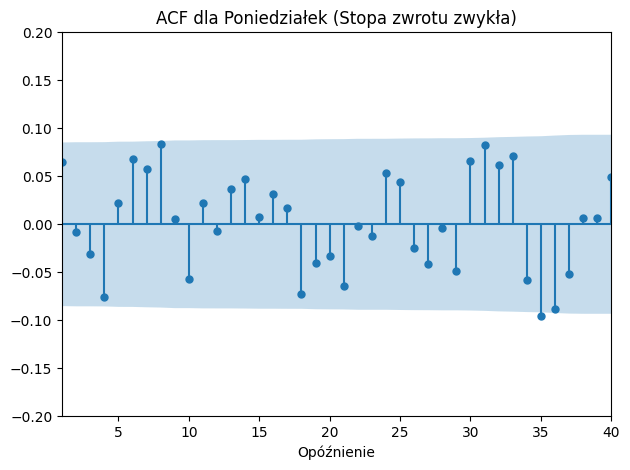

<Figure size 1000x600 with 0 Axes>

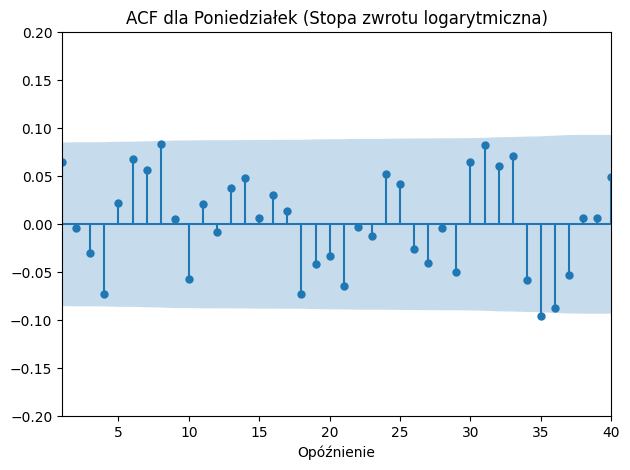

<Figure size 1000x600 with 0 Axes>

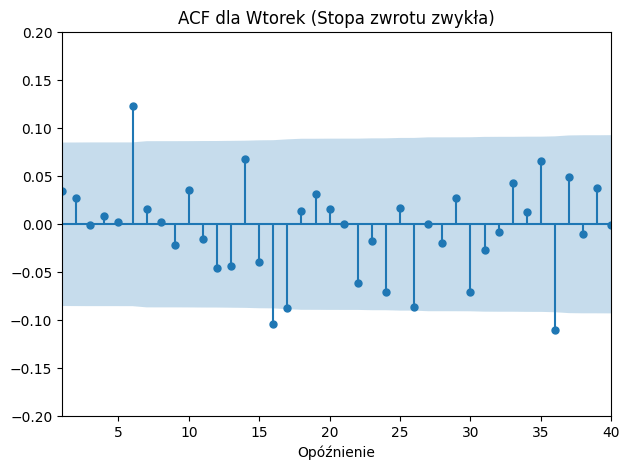

<Figure size 1000x600 with 0 Axes>

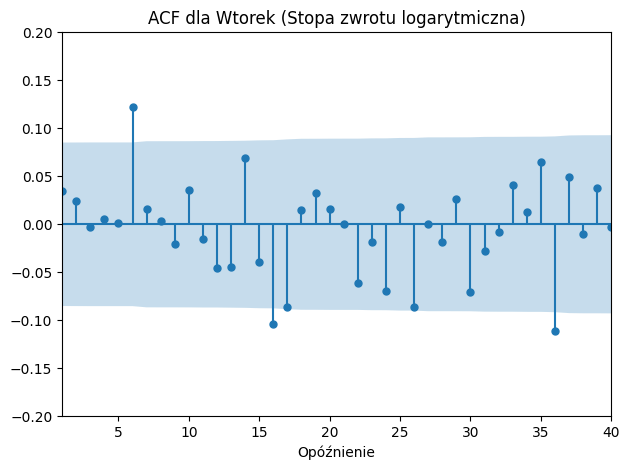

<Figure size 1000x600 with 0 Axes>

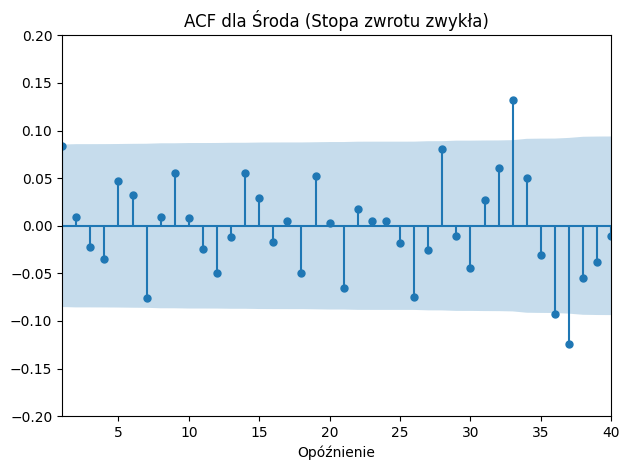

<Figure size 1000x600 with 0 Axes>

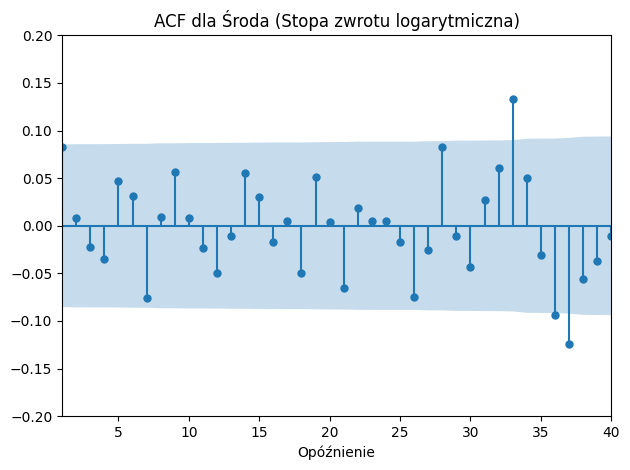

<Figure size 1000x600 with 0 Axes>

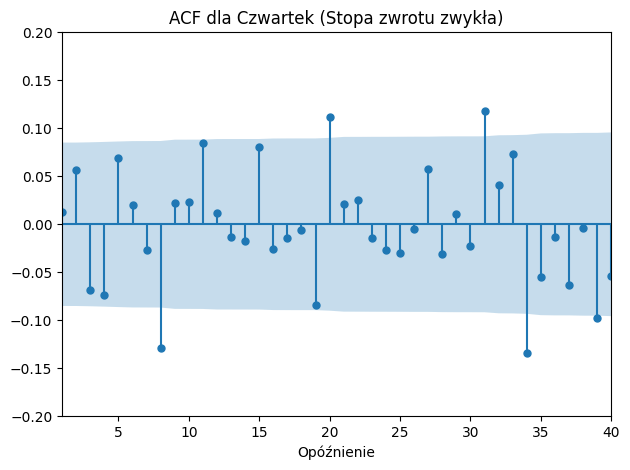

<Figure size 1000x600 with 0 Axes>

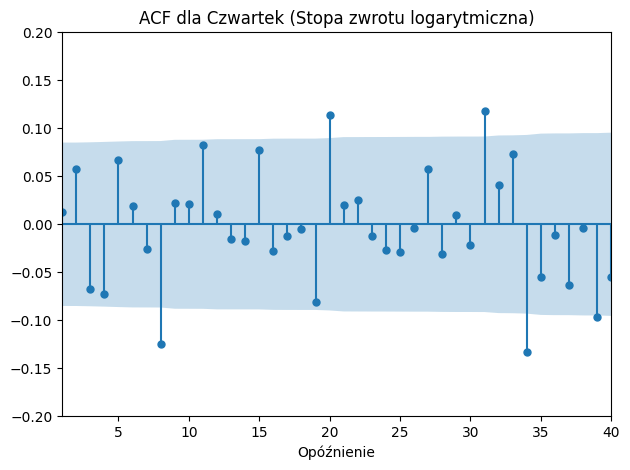

<Figure size 1000x600 with 0 Axes>

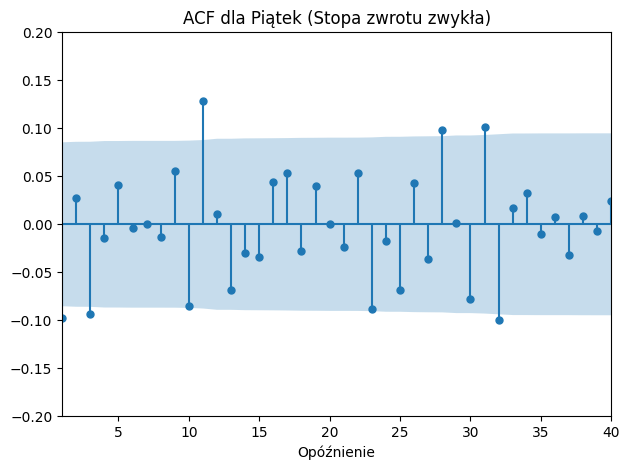

<Figure size 1000x600 with 0 Axes>

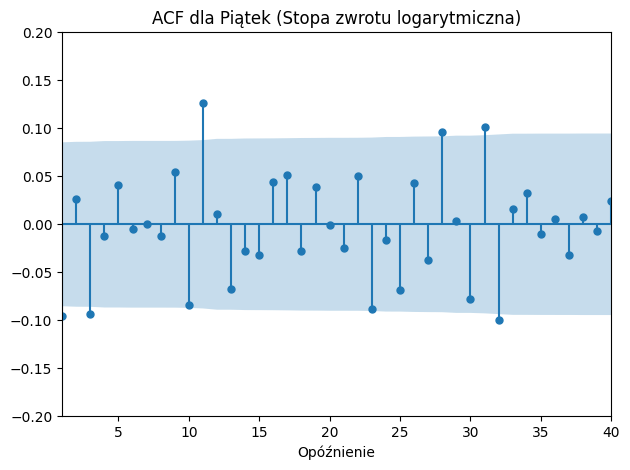

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
def rysuj_acf(df, nazwa):
    plt.figure(figsize=(10, 6)) 
    
    plot_acf(df['Stopa zwrotu zwykła'], lags=40, alpha=0.05) 
    plt.title(f'ACF dla {nazwa} (Stopa zwrotu zwykła)')
    plt.xlabel('Opóźnienie')  
    plt.xlim(1, 40)  
    plt.ylim(-0.2, 0.2)  
    plt.tight_layout()  
    plt.show()  


    plt.figure(figsize=(10, 6))  
    plot_acf(df['Stopa zwrotu logarytmiczna'], lags=40, alpha=0.05)  
    plt.title(f'ACF dla {nazwa} (Stopa zwrotu logarytmiczna)')
    plt.xlabel('Opóźnienie')  
    plt.xlim(1, 40) 
    plt.ylim(-0.2, 0.2)  
    plt.tight_layout()  
    plt.show()  


dni_tygodnia = {
    "Poniedziałek": df_poniedzialek,
    "Wtorek": df_wtorek,
    "Środa": df_sroda,
    "Czwartek": df_czwartek,
    "Piątek": df_piatek
}

for nazwa, df in dni_tygodnia.items():
    rysuj_acf(df, nazwa)


In [12]:

from scipy.stats import wilcoxon, levene


def test_wilcoxon(stopy1, stopy2):
    try:
        stat, p_value = wilcoxon(stopy1, stopy2)
        return p_value
    except ValueError:
        return None  

def test_levene_variance(stopy1, stopy2):
    try:
        levene_stat, p_value = levene(stopy1, stopy2)
        return p_value
    except ValueError:
        return None  


dni_tygodnia = [df_poniedzialek, df_wtorek, df_sroda, df_czwartek, df_piatek]
dni_nazwy = ["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek"]

macierz_wilcoxon_zwykle_5x5 = pd.DataFrame(index=dni_nazwy, columns=dni_nazwy)

macierz_wilcoxon_logarytmiczne_5x5 = pd.DataFrame(index=dni_nazwy, columns=dni_nazwy)

macierz_wilcoxon_porownanie_1x5 = pd.DataFrame(index=["Porównanie"], columns=dni_nazwy)


macierz_levene_zwykle_5x5 = pd.DataFrame(index=dni_nazwy, columns=dni_nazwy)


macierz_levene_logarytmiczne_5x5 = pd.DataFrame(index=dni_nazwy, columns=dni_nazwy)


macierz_levene_porownanie_1x5 = pd.DataFrame(index=["Porównanie"], columns=dni_nazwy)


for i, df1 in enumerate(dni_tygodnia):
    for j, df2 in enumerate(dni_tygodnia):
        if i != j:  

            stopy_zwykle_1 = df1['Stopa zwrotu zwykła']
            stopy_zwykle_2 = df2['Stopa zwrotu zwykła']
            p_value_wilcoxon_zwykle = test_wilcoxon(stopy_zwykle_1, stopy_zwykle_2)
            macierz_wilcoxon_zwykle_5x5.iat[i, j] = p_value_wilcoxon_zwykle


            if p_value_wilcoxon_zwykle is not None:
                macierz_wilcoxon_zwykle_5x5.iat[i, j] = (
                    f"p-value: {p_value_wilcoxon_zwykle:.4f}, "
                    f"H0 {'odrzucona' if p_value_wilcoxon_zwykle < 0.05 else 'nie odrzucona'}"
                )


            stopy_logarytmiczne_1 = df1['Stopa zwrotu logarytmiczna']
            stopy_logarytmiczne_2 = df2['Stopa zwrotu logarytmiczna']
            p_value_wilcoxon_log = test_wilcoxon(stopy_logarytmiczne_1, stopy_logarytmiczne_2)
            macierz_wilcoxon_logarytmiczne_5x5.iat[i, j] = p_value_wilcoxon_log

            if p_value_wilcoxon_log is not None:
                macierz_wilcoxon_logarytmiczne_5x5.iat[i, j] = (
                    f"p-value: {p_value_wilcoxon_log:.4f}, "
                    f"H0 {'odrzucona' if p_value_wilcoxon_log < 0.05 else 'nie odrzucona'}"
                )


for i, df in enumerate(dni_tygodnia):

    stopy_zwykle = df['Stopa zwrotu zwykła']
    stopy_logarytmiczne = df['Stopa zwrotu logarytmiczna']
    p_value_wilcoxon = test_wilcoxon(stopy_zwykle, stopy_logarytmiczne)
    macierz_wilcoxon_porownanie_1x5.iat[0, i] = (
        f"p-value: {p_value_wilcoxon:.4f}, "
        f"H0 {'odrzucona' if p_value_wilcoxon < 0.05 else 'nie odrzucona'}"
    )


for i, df1 in enumerate(dni_tygodnia):
    for j, df2 in enumerate(dni_tygodnia):
        if i != j:  

            stopy_zwykle_1 = df1['Stopa zwrotu zwykła']
            stopy_zwykle_2 = df2['Stopa zwrotu zwykła']
            p_value_levene_zwykle = test_levene_variance(stopy_zwykle_1, stopy_zwykle_2)
            macierz_levene_zwykle_5x5.iat[i, j] = p_value_levene_zwykle


            if p_value_levene_zwykle is not None:
                macierz_levene_zwykle_5x5.iat[i, j] = (
                    f"p-value: {p_value_levene_zwykle:.4f}, "
                    f"H0 {'odrzucona' if p_value_levene_zwykle < 0.05 else 'nie odrzucona'}"
                )


            stopy_logarytmiczne_1 = df1['Stopa zwrotu logarytmiczna']
            stopy_logarytmiczne_2 = df2['Stopa zwrotu logarytmiczna']
            p_value_levene_log = test_levene_variance(stopy_logarytmiczne_1, stopy_logarytmiczne_2)
            macierz_levene_logarytmiczne_5x5.iat[i, j] = p_value_levene_log

            if p_value_levene_log is not None:
                macierz_levene_logarytmiczne_5x5.iat[i, j] = (
                    f"p-value: {p_value_levene_log:.4f}, "
                    f"H0 {'odrzucona' if p_value_levene_log < 0.05 else 'nie odrzucona'}"
                )


for i, df in enumerate(dni_tygodnia):
    stopy_zwykle = df['Stopa zwrotu zwykła']
    stopy_logarytmiczne = df['Stopa zwrotu logarytmiczna']
    p_value_levene = test_levene_variance(stopy_zwykle, stopy_logarytmiczne)
    macierz_levene_porownanie_1x5.iat[0, i] = (
        f"p-value: {p_value_levene:.4f}, "
        f"H0 {'odrzucona' if p_value_levene < 0.05 else 'nie odrzucona'}"
    )

print("Macierz Wilcoxona (stopa zwrotu zwykła) - 5x5:")
print(macierz_wilcoxon_zwykle_5x5)
print("\nMacierz Wilcoxona (stopa zwrotu logarytmiczna) - 5x5:")
print(macierz_wilcoxon_logarytmiczne_5x5)
print("\nMacierz Wilcoxona (porównanie stóp) - 1x5:")
print(macierz_wilcoxon_porownanie_1x5)

print("\nMacierz Levene’a (stopa zwrotu zwykła) - 5x5:")
print(macierz_levene_zwykle_5x5)
print("\nMacierz Levene’a (stopa zwrotu logarytmiczna) - 5x5:")
print(macierz_levene_logarytmiczne_5x5)
print("\nMacierz Levene’a (porównanie stóp) - 1x5:")
print(macierz_levene_porownanie_1x5)

Macierz Wilcoxona (stopa zwrotu zwykła) - 5x5:
                                   Poniedziałek  \
Poniedziałek                                NaN   
Wtorek        p-value: 0.4266, H0 nie odrzucona   
Środa             p-value: 0.0200, H0 odrzucona   
Czwartek          p-value: 0.0324, H0 odrzucona   
Piątek            p-value: 0.0167, H0 odrzucona   

                                         Wtorek  \
Poniedziałek  p-value: 0.4266, H0 nie odrzucona   
Wtorek                                      NaN   
Środa             p-value: 0.0303, H0 odrzucona   
Czwartek      p-value: 0.1064, H0 nie odrzucona   
Piątek            p-value: 0.0203, H0 odrzucona   

                                          Środa  \
Poniedziałek      p-value: 0.0200, H0 odrzucona   
Wtorek            p-value: 0.0303, H0 odrzucona   
Środa                                       NaN   
Czwartek      p-value: 0.9464, H0 nie odrzucona   
Piątek        p-value: 0.9811, H0 nie odrzucona   

                                

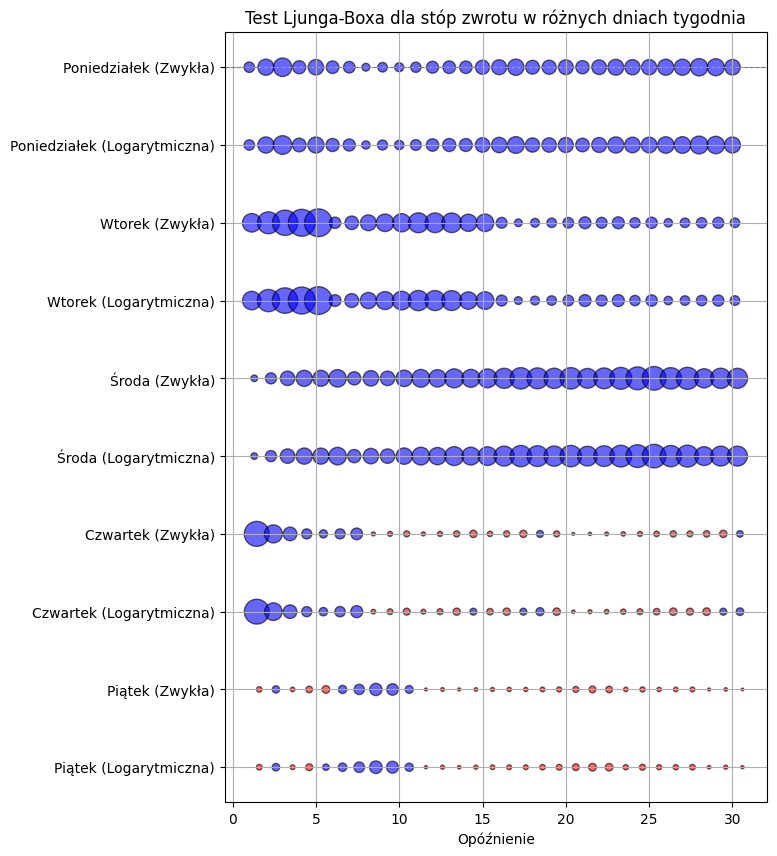

In [248]:

import statsmodels.api as sm

dni_tygodnia = {
    "Poniedziałek": df_poniedzialek,
    "Wtorek": df_wtorek,
    "Środa": df_sroda,
    "Czwartek": df_czwartek,
    "Piątek": df_piatek
}
k = 30
dni = list(dni_tygodnia.keys())
red_color = 'red'  
blue_color = 'blue'  


max_p_value_regular = 0
max_p_value_log = 0


for df in dni_tygodnia.values():
    lb_test = sm.stats.acorr_ljungbox(df['Stopa zwrotu zwykła'], lags=k, return_df=True)
    p_values = lb_test['lb_pvalue']
    max_p_value_regular = max(max_p_value_regular, p_values.max())
    
    lb_test_log = sm.stats.acorr_ljungbox(df['Stopa zwrotu logarytmiczna'], lags=k, return_df=True)
    p_values_log = lb_test_log['lb_pvalue']
    max_p_value_log = max(max_p_value_log, p_values_log.max())

plt.figure(figsize=(7, 10))


for i, (day, df) in enumerate(dni_tygodnia.items()):
    lb_test = sm.stats.acorr_ljungbox(df['Stopa zwrotu zwykła'], lags=k, return_df=True)
    p_values = lb_test['lb_pvalue']

    sizes = np.where(p_values <= 0.05, (p_values / max_p_value_regular) * 600, (p_values / max_p_value_regular) * 400)


    colors_for_day = [red_color if p_value <= 0.05 else blue_color for p_value in p_values]

    plt.scatter(lb_test.index + i * 0.15, np.full_like(p_values, i * 2), s=sizes, 
                c=colors_for_day, alpha=0.6, edgecolors='black', label='Zwykła Stopa')


    lb_test_log = sm.stats.acorr_ljungbox(df['Stopa zwrotu logarytmiczna'], lags=k, return_df=True)
    p_values_log = lb_test_log['lb_pvalue']
    

    sizes_log = np.where(p_values_log <= 0.05, (p_values_log / max_p_value_log) * 600, (p_values_log / max_p_value_log) * 400)


    colors_for_day_log = [red_color if p_value <= 0.05 else blue_color for p_value in p_values_log]


    plt.scatter(lb_test_log.index + i * 0.15, np.full_like(p_values_log, i * 2 + 1), s=sizes_log, 
                c=colors_for_day_log, alpha=0.6, edgecolors='black', label='Logarytmiczna Stopa')


plt.title('Test Ljunga-Boxa dla stóp zwrotu w różnych dniach tygodnia')
plt.xlabel('Opóźnienie')
plt.yticks(np.arange(0, 10, 1), [f"{dni[j // 2]} ({'Zwykła' if j % 2 == 0 else 'Logarytmiczna'})" for j in range(10)])  
plt.axhline(0, color='grey', lw=0.8, ls='--')
plt.xticks(np.arange(0, k + 1, 5))


plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
